<h2>Logistic Regression MultiClass</h2>

### Loading data 

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [55]:
from sklearn.datasets import load_iris
iris = load_iris(as_frame = True)

df = iris.frame
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [56]:
df['target_name'] = df['target'].map({0:'setosa',1:'versicolor',2:'virginica'})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [57]:
df.target.unique()

array([0, 1, 2])

In [58]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [59]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [60]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

### data visualizaation and exploration 

<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

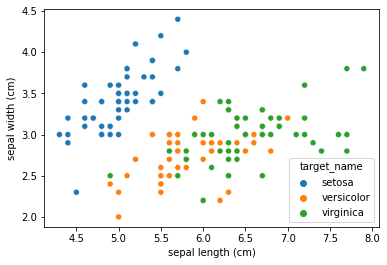

In [61]:
sns.scatterplot(data = df,x="sepal length (cm)",y="sepal width (cm)",hue = "target_name")

<AxesSubplot:xlabel='petal length (cm)', ylabel='petal width (cm)'>

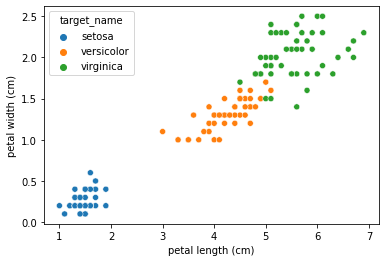

In [63]:
sns.scatterplot(data = df,x="petal length (cm)",y="petal width (cm)",hue = "target_name")

In [65]:
x= df[["sepal length (cm)","sepal width (cm)","petal length (cm)","petal width (cm)"]]
y=df['target']
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=5)

In [70]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter = 200)
model.fit(x_train,y_train)

LogisticRegression(max_iter=200)

### model evaluation

In [71]:
model.score(x_test,y_test)

0.9777777777777777

In [72]:
y_pred = model.predict(x_test)

In [73]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9777777777777777

In [76]:
y_pred[:10]

array([1, 2, 2, 0, 2, 1, 0, 2, 0, 1])

In [75]:
y_test[:10].tolist()

[1, 2, 2, 0, 2, 1, 0, 1, 0, 1]

### Precision , Recall , F1 score

In [78]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.94      0.97        16
           2       0.93      1.00      0.97        14

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



### model evaluation confussion matrix 

In [79]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0, 15,  1],
       [ 0,  0, 14]], dtype=int64)

Text(0.5, 1.0, 'confusion matrix')

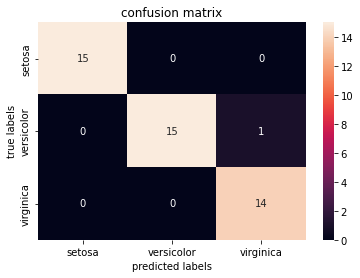

In [84]:
sns.heatmap(cm,xticklabels=iris.target_names,yticklabels=iris.target_names,annot = True)
plt.xlabel('predicted labels')
plt.ylabel('true labels')
plt.title('confusion matrix')

